# Analysis

**Problem Statement:**

There are so many apps on app store, some paid some free; I want to validate few of these scenarios:
 - What makes an app successfull, what is that metric
 - What other metrics are available?
 - Is there correlation between this success metric and other metrics
 - What does the clusters look like if we try to cluster them
 
This might sound vague at the moment but essentially I want to analyse apps in app store;

In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("Set1", 8, .75)

In [13]:
of = open("../dataset/app.01.mod.json", "w")
with open ("../dataset/app.01.json", "r", encoding="utf-8") as ifp:
    data = json.load(ifp)
    
#     print (data)
    json.dump(data['results'], of)
    
of.close()

In [14]:
df = pd.read_json("../dataset/app.01.mod.json")

In [17]:
df.columns

Index(['advisories', 'appletvScreenshotUrls', 'artistId', 'artistName',
       'artistViewUrl', 'artworkUrl100', 'artworkUrl512', 'artworkUrl60',
       'averageUserRating', 'averageUserRatingForCurrentVersion', 'bundleId',
       'contentAdvisoryRating', 'currency', 'currentVersionReleaseDate',
       'description', 'features', 'fileSizeBytes', 'formattedPrice',
       'genreIds', 'genres', 'ipadScreenshotUrls', 'isGameCenterEnabled',
       'isVppDeviceBasedLicensingEnabled', 'kind', 'languageCodesISO2A',
       'minimumOsVersion', 'price', 'primaryGenreId', 'primaryGenreName',
       'releaseDate', 'releaseNotes', 'screenshotUrls', 'sellerName',
       'sellerUrl', 'supportedDevices', 'trackCensoredName',
       'trackContentRating', 'trackId', 'trackName', 'trackViewUrl',
       'userRatingCount', 'userRatingCountForCurrentVersion', 'version',
       'wrapperType'],
      dtype='object')

In [20]:
df2 = df[['artistId', 'artistName', 'averageUserRating', 'averageUserRatingForCurrentVersion', 'bundleId',
          'contentAdvisoryRating', 'currency', 'currentVersionReleaseDate', 'description', 'features',
          'fileSizeBytes', 'formattedPrice', 'genreIds', 'genres', 'kind', 'minimumOsVersion', 'price',
         'primaryGenreName', 'releaseDate', 'releaseNotes',  'sellerName', 'userRatingCount',
          'userRatingCountForCurrentVersion', 'version']]

### Average User Rating

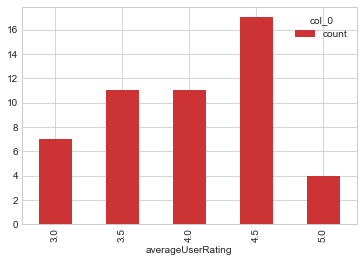

In [32]:
pd.crosstab(df2['averageUserRating'], 'count').plot(kind='bar')

In [33]:
df2['averageUserRating'].value_counts()

4.5    17
3.5    11
4.0    11
3.0     7
5.0     4
Name: averageUserRating, dtype: int64

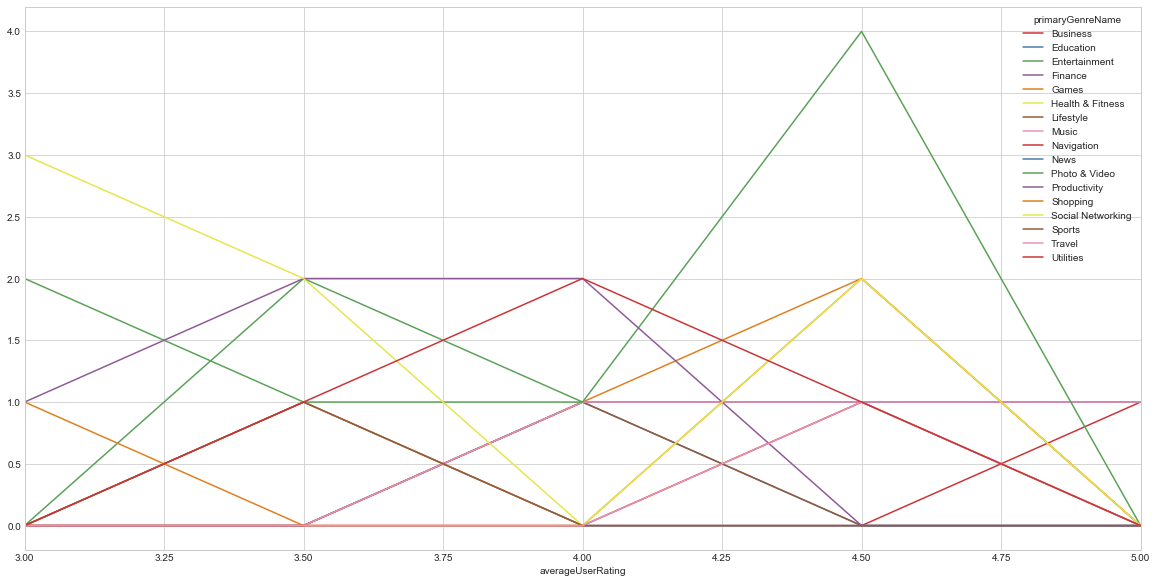

In [48]:
pd.crosstab(df2['averageUserRating'], df2['primaryGenreName']).plot(kind="line", figsize=(20, 10))